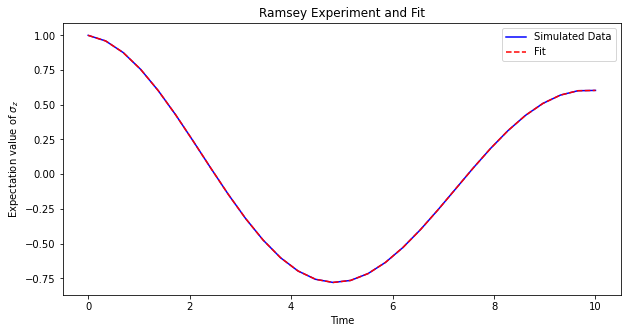

Extracted T2 (dephasing time): 19.80


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.optimize import curve_fit

# Parameters
omega = 100 * 2 * np.pi      # qubit frequency, 1 Hz
gamma = 0.05              # dephasing rate
times = np.linspace(0, 10, 30)  # time range for the Ramsey experiment

# Qubit states
psi0 = (basis(2,0) + basis(2,1)).unit()  # superposition state (|0> + |1>)/sqrt(2)
sz = sigmaz()                            # Pauli Z operator
sx = sigmax()
# Dephasing environment
c_ops = [np.sqrt(gamma/2) * sigmap()*sigmam()*2]  # collapse operator for dephasing

# Time evolution
result = mesolve(omega*sz, psi0, times, c_ops, [sx])

# Extracting and processing simulation data
ramsey_signal = result.expect[0]

# Function to model Ramsey fringes (with decay)
def ramsey_fringe(t, A, B, T2, omega):
    return np.exp(-t / T2)*np.cos(omega*t) 

# Fit the model to the simulated data
popt, pcov = curve_fit(ramsey_fringe, times, ramsey_signal, p0=[1, 0., 5, 1], maxfev=100000)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(times, ramsey_signal, 'b-', label='Simulated Data')
plt.plot(times, ramsey_fringe(times, *popt), 'r--', label='Fit')
plt.title('Ramsey Experiment and Fit')
plt.xlabel('Time')
plt.ylabel('Expectation value of $\\sigma_z$')
plt.legend()
plt.show()

# Print the dephasing rate T2
print("Extracted T2 (dephasing time): {:.2f}".format(popt[2]))


In [112]:
popt

array([1.        , 0.        , 9.72550948, 0.63302276])

In [115]:
sigmam()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0. 0.]
 [1. 0.]]